# **Сборный проект**

**Описание проекта**

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Данные за 2016 год могут быть неполными.*



**Цель исследования**:

Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Ход исследования:**

1.   Обзор данных
2.   Предобработка данных
3.   Исследователтский анализ данных
4.   Создание портрета пользователя по регионам
5.   Формулировка и проверка гипотез
6.   Общий вывод

# **Шаг 1. Откроем файл с данными и изучим общую информацию**


In [104]:
!wget https://code.s3.yandex.net/datasets/games.csv

--2023-02-21 07:44:52--  https://code.s3.yandex.net/datasets/games.csv
Resolving code.s3.yandex.net (code.s3.yandex.net)... 93.158.134.158, 2a02:6b8::2:158
Connecting to code.s3.yandex.net (code.s3.yandex.net)|93.158.134.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1178518 (1.1M) [application/octet-stream]
Saving to: ‘games.csv.2’

games.csv.2         100%[===================>]   1.12M  3.96MB/s    in 0.3s    

2023-02-21 07:44:52 (3.96 MB/s) - ‘games.csv.2’ saved [1178518/1178518]



In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

Откроем файл сохраним DataFrame в переменную games.

In [106]:
games = pd.read_csv("games.csv")

Выведем первые 5 строк DataFrame games.

In [107]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем последние 5 строк DataFrame games.

In [108]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Выведем основную информацию для DataFrame games с помощью метода info().

In [109]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Выведем сводную статистику с помощью метода description().

In [110]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Выведем рандомную строку DataFrame с помощью метода sample()

In [111]:
games.sample()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
9889,Uta no * Prince-Sama: All Star,PSP,2013.0,Action,0.0,0.0,0.12,0.0,NaN,NaN,NaN


С помощью метода plot() выведем гистограмму для столбца с годами выпуска и посмотрим на распределение данных.

[Text(0.5, 1.0, 'Распределение игр по году выпуска')]

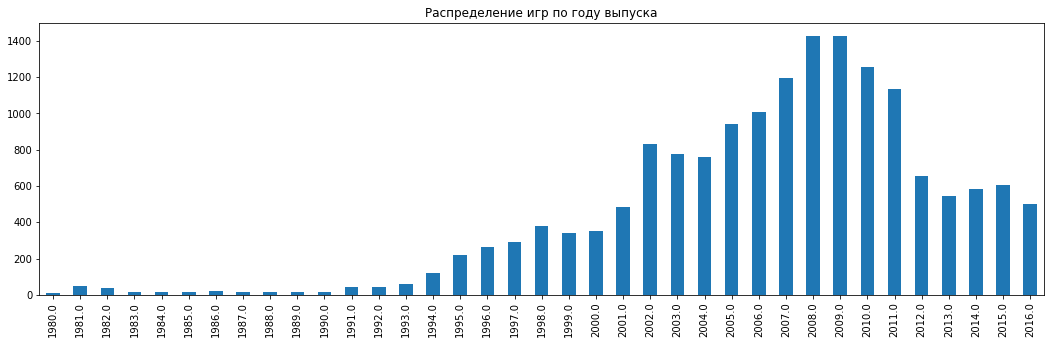

In [112]:
games['Year_of_Release'].value_counts().sort_index().plot(kind='bar' ,figsize=(18,5)).set(title='Распределение игр по году выпуска')

С помощью метода plot() выведем гистограмму для столбца с оценками критиков и посмотрим на распределение данных.

[Text(0.5, 1.0, 'Распределение оценок критиков')]

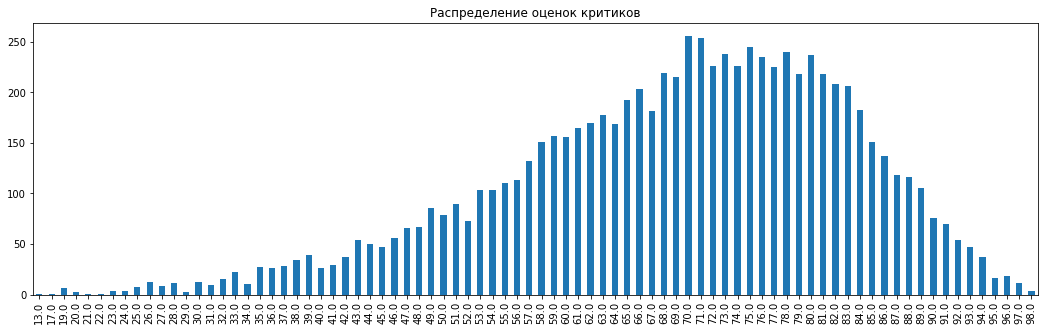

In [113]:
games['Critic_Score'].value_counts().sort_index().plot(kind='bar' ,figsize=(18,5)).set(title='Распределение оценок критиков')

[Text(0.5, 1.0, 'Распределение оценок пользователей')]

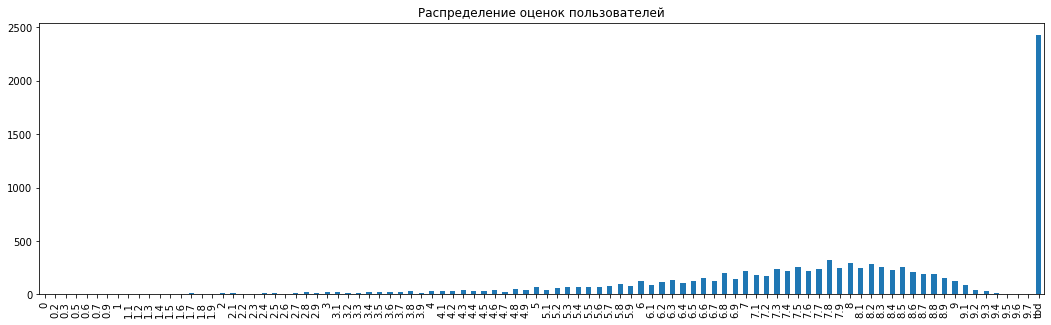

In [114]:
games['User_Score'].value_counts().sort_index().plot(kind='bar' ,figsize=(18,5)).set(title='Распределение оценок пользователей')

Проверим дубликаты с помощью метода duplicated().sum().

In [115]:
games.duplicated().sum()

0

In [116]:
games.duplicated(subset=['Name','Platform'], keep=False).sum()

10

In [117]:
games[games.duplicated(subset=['Name','Platform'], keep=False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Проверим количество пропусков с помощью метода isna().

In [118]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# **Вывод по шагу 1**

1. Перед нами DataFrame с 11 колонками и 16715 строчками
2. Необходимо преобразовать тип данных в столбце 'Year of Release' в 'Int'
3. Необходимо привести к нижнему регистру названия всех столбцов 
4. Явных дубликатов в DataFrame нет, есть дубликаты в связке название-платформа
5. Имеются пустые значения в столбцах 'Year of Release', 'Critic_Score', 'User_Score' и 'Rating' с которыми предстоит разобраться
6. Столбец 'User_Score' имеет большое количество значений 'tbd', необходимо разобраться с этим значением

# **Шаг 2. Подготовим данные**

* Заменим названия столбцов (приведем к нижнему регистру);
* Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
* Обработаем пропуски при необходимости:
 * Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
 * Опишем причины, которые могли привести к пропускам;
 * Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберем это значение и опишем, как его обработать;
* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Заменим названия столбцов (приведем к нижнему регистру), проверим изменения.

In [119]:
games.columns = games.columns.str.lower()

In [120]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [121]:
games = games.drop([659,14244,16230])

Преобразуем тип данных столбца year_of_release к Int64

In [122]:
games['year_of_release'] = games['year_of_release'].astype('Int64')

Посмотрим детальнее на пропуски и при необходимости обработаем их.

In [123]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [124]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [125]:
games['year_of_release'].isna().sum()

269

In [126]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [127]:
games[games['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [128]:
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [129]:
games.loc[(games['critic_score'].isna()) & (games['user_score'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [130]:
games['critic_score'].fillna(0, inplace=True)

Столбец user_score содержит значение 'tbd'.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

Возможно еще недостаточно пользовательских голосов, чтобы выдать результат или игра непопулярна.

Заменим это значение на nan и приведем к типу float, а после заменим нулевыми значениями.

In [131]:
games['user_score'] = games['user_score'].replace('tbd', float('nan'))

In [132]:
games['user_score'] = games['user_score'].astype('float')

In [133]:
games['user_score'].fillna(0, inplace=True)

In [134]:
games["critic_score"] = games["critic_score"].astype('int64')

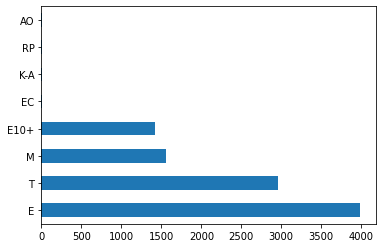

In [135]:
games['rating'].value_counts().plot(kind='barh')

In [136]:
games['rating'].fillna('Undefined', inplace=True)

In [137]:
games.isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score         0
user_score           0
rating               0
dtype: int64

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales.

In [138]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [139]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,Undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,Undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,Undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,0.0,Undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,Undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,0.0,Undefined,0.01


# Вывод по шагу 2

1. Заменены названия столбцов (приведены к нижнему регистру)
2. Преобразованы типы данные в столбцах year_of_release и user_score, поскольку первоначальные типы данных не дадут возможность производить какие-либо действия с этими столбцами
3. Заполнены пропуски в столбце year_of_release значением года из названия игры
4. Пропуски в столбцах critic_score и user_score заменены на нулевые, что означает, что оценки нет. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. произойдет смещение данных.
Удалены строки с пропусками в столбце name и genre
5. Пропуски могли возникнуть по нескольким причинам: техническая ошибка или отсутствие данных (например, нет оценки пользователей, поэтому значения и отсутсвуют. Одна из возможных причин - данные не оценивались вообще. 
6. Значение 'tbd' заменено на nan, а после заполненно 0
7. Посчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец  их в отдельный столбец total_sales








# **Шаг 3. Проведем исследовательский анализ данных**

* Посмотрим, сколько игр выпускалось в разные годы и ответим на вопрос "Важны ли данные за все периоды"?
* Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос "За какой характерный срок появляются новые и исчезают старые платформы?"
* Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не будем учитывать в работе данные за предыдущие годы.
* Ответим на вопрос "Какие платформы лидируют по продажам, растут или падают?" Выберем несколько потенциально прибыльных платформ.
* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
* Соотнесем выводы с продажами игр на других платформах.
* Посмотрим на общее распределение игр по жанрам. Ответим на вопросы "Что можно сказать о самых прибыльных жанрах?" и "Выделяются ли жанры с высокими и низкими продажами?"

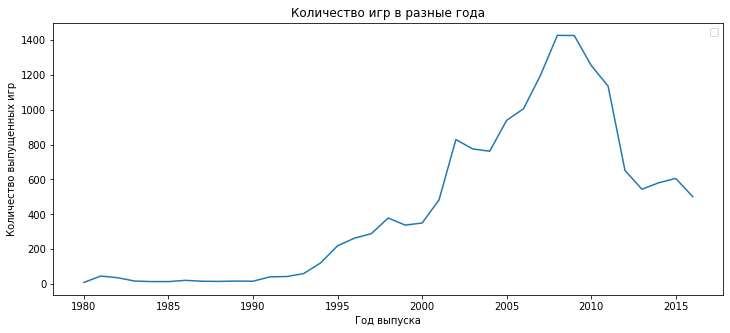

In [140]:
games_period = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(12,5))
sns.lineplot(data=games_period)
plt.title("Количество игр в разные года")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')

График показывает, что количество выпущенных игр начало расти с 1995 по 2009 год, а с 2009 года количество выпущенных игр начинает резко падать. Возможно это связано с созданием мобильных игр и вообще массовым появлением мобильных гаджетов. 

Интересно, что в 2014 году происходит заметный рост и возможно это связано с появлением приставок нового поколения, таких как Xbox One в 2013 году. 

Безусловно данные важны за все периоды, поскольку по этим данным можно отследить историю развития компьютерных игр, связать с различными событиями, сделать выводы и спланировать не только рекламную кампанию в текущем периоде, но и предсказать развитие технологий в будущем.

Посмотрим как менялись продажи по платформам, посмотрим на платформу с наибольшими суммарными продажами (в нашем случае это 'PS2'), построим распределение продаж по годам.

Text(0, 0.5, 'Количество продаж')

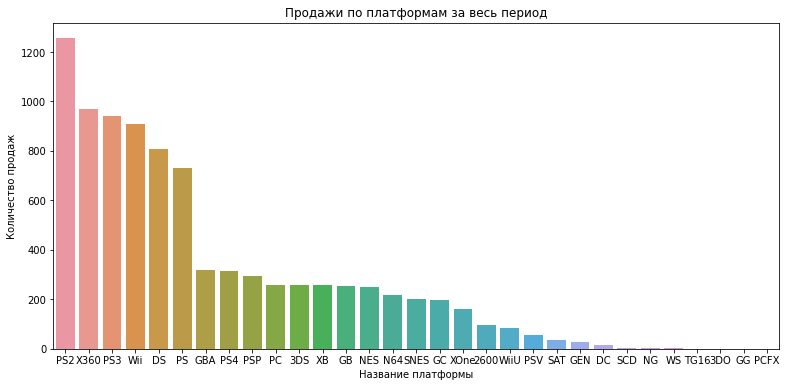

In [141]:
platform_sales = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

График показывает, что больше всего продаж на платформах PS2, X360, WII, PS3, DS и PS

In [142]:
PS2 = games[games['platform'] =='PS2']

In [143]:
PS2.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2127.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000,2161.000000
mean,2004.583921,0.270171,0.157006,0.064415,0.089514,41.280888,4.379870,0.581106
std,2.567689,0.579904,0.361596,0.198542,0.338839,35.159508,3.900254,1.137927
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2002.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.080000
50%,2005.000000,0.090000,0.050000,0.000000,0.020000,56.000000,6.200000,0.230000
75%,2007.000000,0.250000,0.150000,0.030000,0.070000,73.000000,8.200000,0.560000
max,2011.000000,9.430000,5.490000,3.610000,10.570000,97.000000,9.500000,20.810000


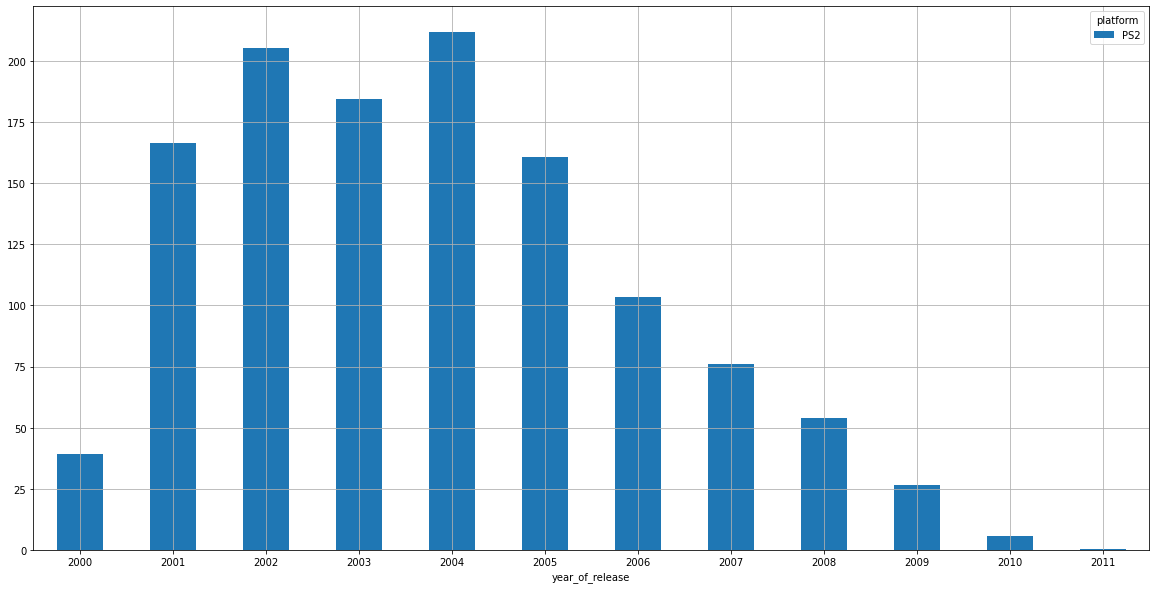

In [144]:
PS2.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")\
    .fillna(0).plot.bar(rot=0, grid=True, figsize=(20, 10), stacked=True)

In [145]:
(PS2[PS2['total_sales'] == 2000]).sum()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
total_sales        0.0
dtype: float64

In [146]:
pd.pivot_table(PS2, index=['year_of_release'], values=['total_sales'], aggfunc = sum)

,total_sales
year_of_release,
2000,39.17
2001,166.43
2002,205.38
2003,184.31
2004,211.81
2005,160.66
2006,103.42
2007,75.99
2008,53.90


Выведем топ-5 платформ с распределением продаж по годам за весь период

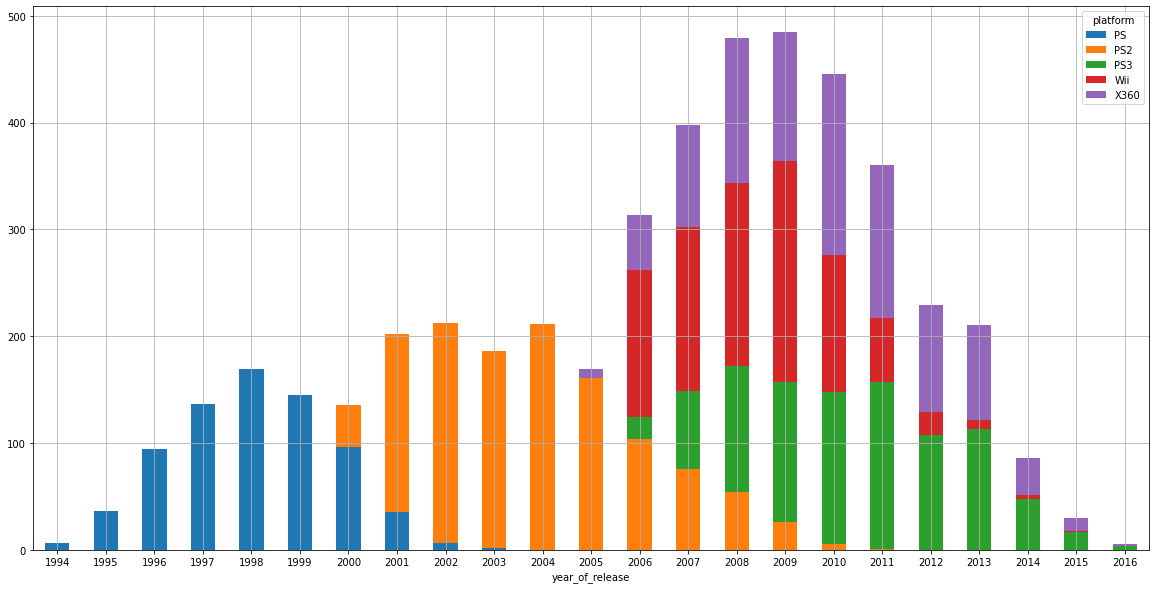

In [147]:
platforms = ['PS2', 'PS3', 'X360', 'Wii', 'PS']

xdf = games[games.platform.isin(platforms)]

xdf.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")\
    .fillna(0).plot.bar(rot=0, grid=True, figsize=(20, 10), stacked=True)

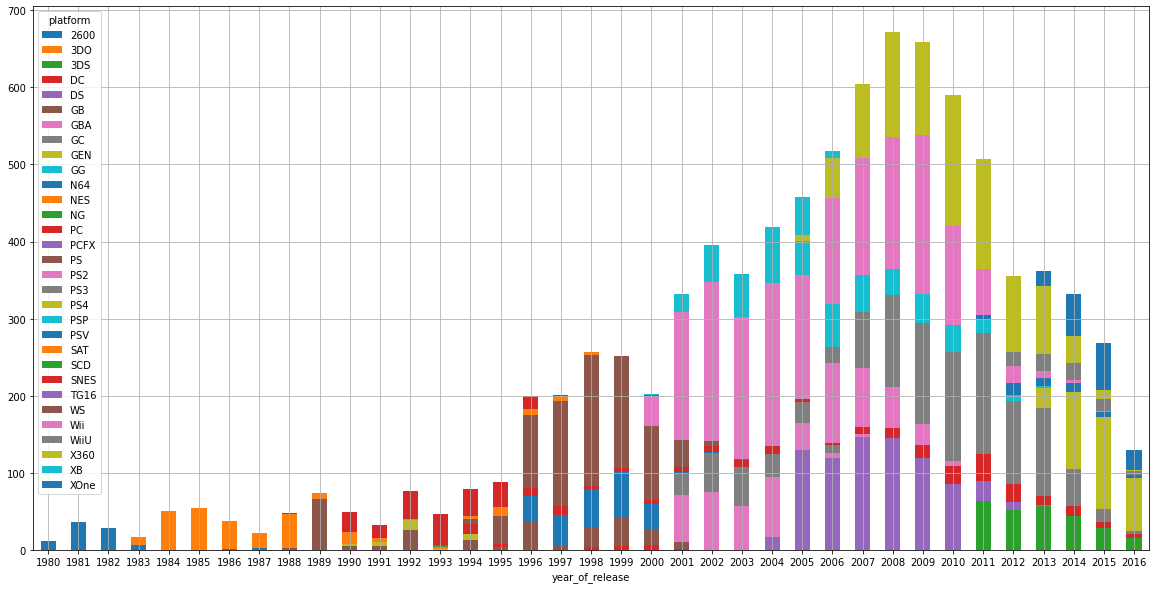

In [148]:
games.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")\
    .fillna(0).plot.bar(rot=0, grid=True, figsize=(20, 10), stacked=True)

На графике заметен характерный срок "активной" жизни платформы, он составляет от 6 до 7 лет. Далее происходит вытеснение новыми платформами.

Возьмем данные за актуальный период. В нашем случае, это данные с 2009 года.


In [149]:
games_actual = games[games['year_of_release'] > 2009]

In [150]:
games[games['platform'] == 'PS4'].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,2015.145408,0.277398,0.359923,0.040714,0.123342,46.344388,4.424235,0.801378
std,0.868181,0.583723,0.810843,0.069101,0.254825,36.004920,3.420952,1.609456
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2015.000000,0.007500,0.000000,0.000000,0.010000,0.000000,0.000000,0.060000
50%,2015.000000,0.060000,0.080000,0.010000,0.030000,64.500000,6.100000,0.200000
75%,2016.000000,0.260000,0.300000,0.050000,0.110000,77.000000,7.500000,0.730000
max,2016.000000,6.030000,6.310000,0.490000,2.380000,97.000000,9.200000,14.630000


In [151]:
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,0,0.0,Undefined,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


In [152]:
games_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5276 entries, 14 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             5276 non-null   object 
 1   platform         5276 non-null   object 
 2   year_of_release  5276 non-null   Int64  
 3   genre            5276 non-null   object 
 4   na_sales         5276 non-null   float64
 5   eu_sales         5276 non-null   float64
 6   jp_sales         5276 non-null   float64
 7   other_sales      5276 non-null   float64
 8   critic_score     5276 non-null   int64  
 9   user_score       5276 non-null   float64
 10  rating           5276 non-null   object 
 11  total_sales      5276 non-null   float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 541.0+ KB


(0.0, 3.0)

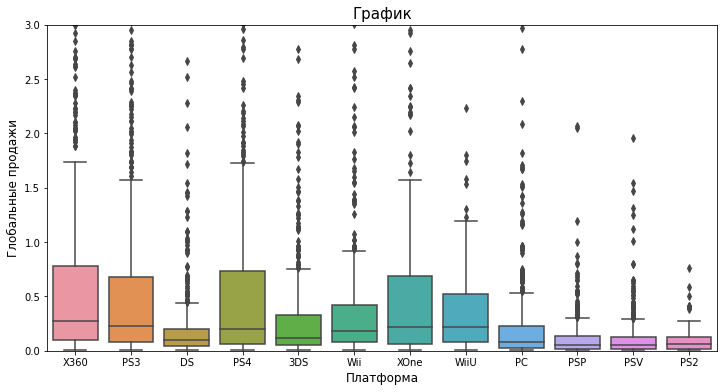

In [153]:
plt.figure(figsize=(12,6))
sns.boxplot(data=games_actual, x='platform', y='total_sales')
plt.title('График', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,3)

Определим потенциально прибыльные платформы

In [154]:
top_5_platforms = games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(5)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

In [155]:
top_5_platforms

,platform,total_sales
0,PS3,587.73
1,X360,550.41
2,PS4,314.14
3,3DS,257.81
4,Wii,222.97


Text(0, 0.5, 'Количество продаж')

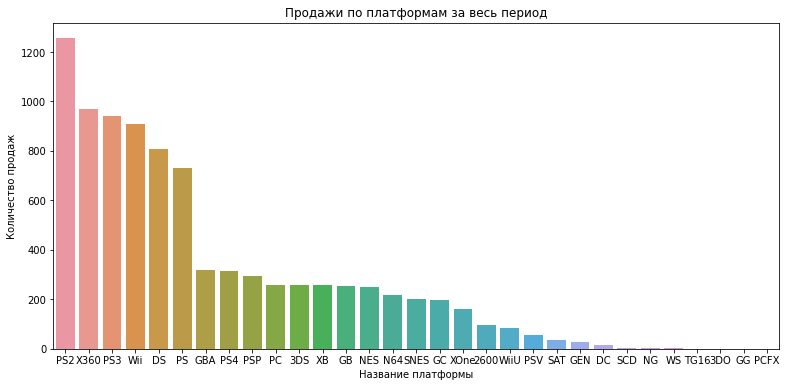

In [156]:
best_platform = games_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

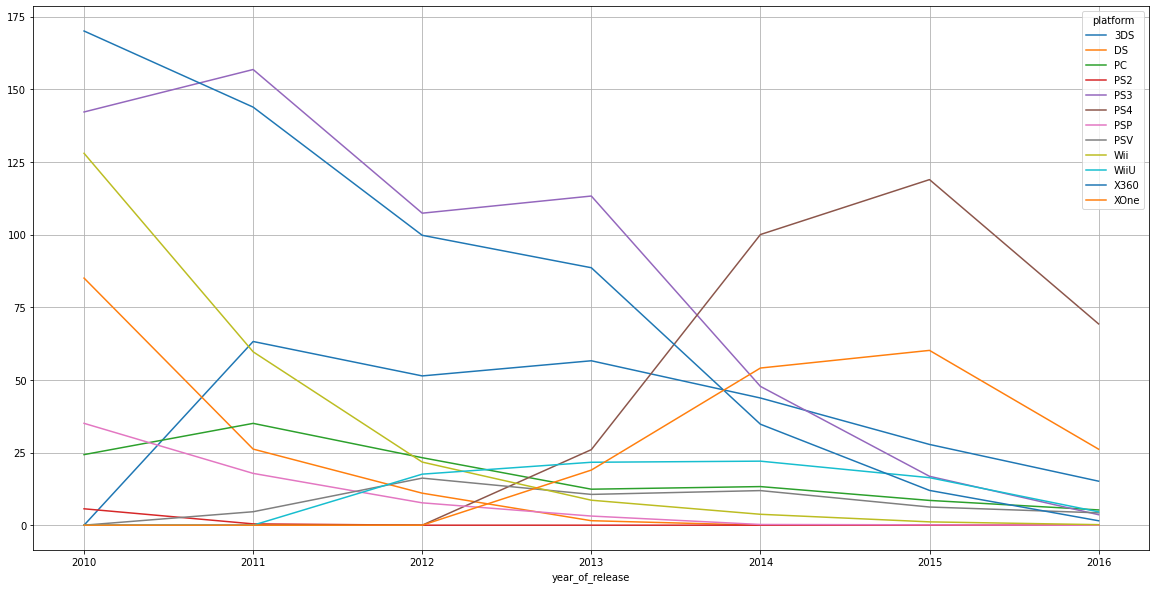

In [157]:
games_actual.pivot_table(index="year_of_release", columns="platform", values="total_sales", aggfunc="sum")\
    .fillna(0).plot(rot=0, grid=True, figsize=(20, 10), stacked=False)

In [158]:
list_of_top5 = ['X360', 'Wii', 'PS3', '3DS', 'PS4']
df_top_5_platforms = games_actual[games_actual['platform'].isin(list_of_top5)]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales'] < 1.5]
df_top_5_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1270,Dead Rising 2,X360,2010,Action,0.75,0.52,0.09,0.12,79,6.9,M,1.48
1273,Mafia II,PS3,2010,Action,0.50,0.69,0.04,0.26,75,7.7,M,1.49
1275,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,0,0.0,Undefined,1.49
1282,Resistance 3,PS3,2011,Shooter,0.64,0.57,0.05,0.22,83,7.8,M,1.48
1288,LEGO Star Wars III: The Clone Wars,X360,2011,Action,0.84,0.51,0.00,0.13,75,7.8,E10+,1.48


In [159]:
df_top_5_platforms.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,2012.393605,0.136304,0.090537,0.041382,0.030598,30.939094,3.336582,0.298820
std,2.007318,0.181615,0.133791,0.099601,0.043178,34.647173,3.460464,0.330344
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2011.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2012.000000,0.070000,0.030000,0.000000,0.010000,0.000000,2.200000,0.170000
75%,2014.000000,0.190000,0.120000,0.040000,0.040000,68.000000,7.000000,0.420000
max,2016.000000,1.080000,0.890000,1.330000,0.270000,94.000000,9.000000,1.490000


In [160]:
display(df_top_5_platforms.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1270,Dead Rising 2,X360,2010,Action,0.75,0.52,0.09,0.12,79,6.9,M,1.48
1273,Mafia II,PS3,2010,Action,0.50,0.69,0.04,0.26,75,7.7,M,1.49
1275,Doom (2016),PS4,2016,Shooter,0.54,0.69,0.02,0.24,0,0.0,Undefined,1.49
1282,Resistance 3,PS3,2011,Shooter,0.64,0.57,0.05,0.22,83,7.8,M,1.48
1288,LEGO Star Wars III: The Clone Wars,X360,2011,Action,0.84,0.51,0.00,0.13,75,7.8,E10+,1.48


(0.0, 1.0)

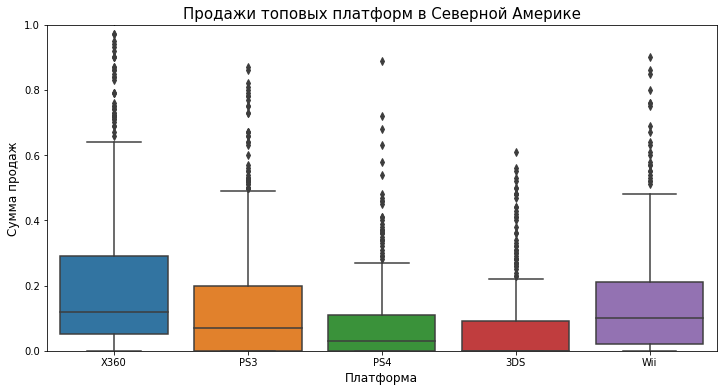

In [161]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='na_sales')
plt.title('Продажи топовых платформ в Северной Америке', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.ylim(0,1)

(0.0, 0.8)

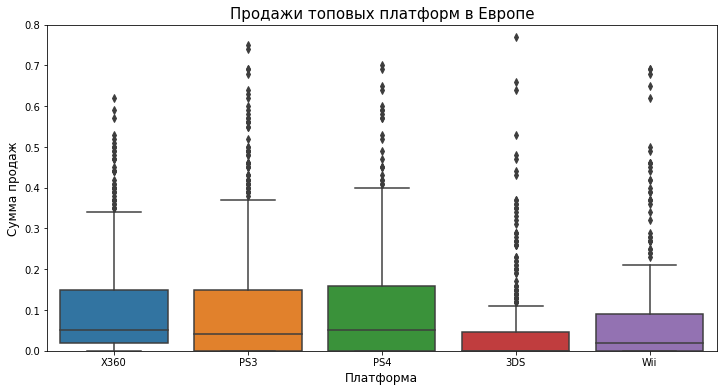

In [162]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='eu_sales')
plt.title('Продажи топовых платформ в Европе', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.ylim(0,0.8)

(0.0, 0.5)

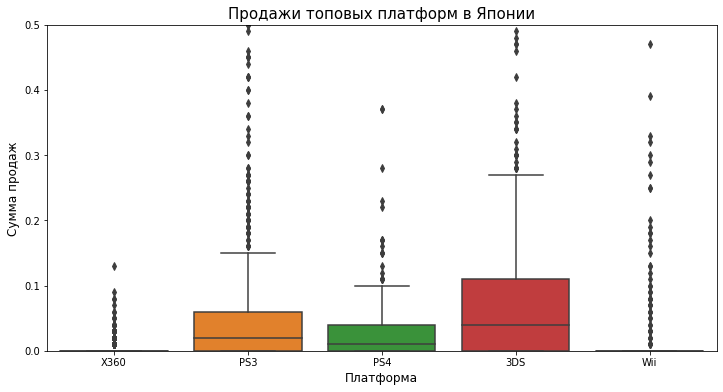

In [163]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='jp_sales')
plt.title('Продажи топовых платформ в Японии', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.ylim(0,0.5)

На боксплоте отображены продажи топовых платформ в Японии. В актуальном периоде Х360 в Японии не популярна.

Потенциально прибыльные платформы в 2017 году на графике выше.


In [164]:
pd.pivot_table(df_top_5_platforms, index=['year_of_release', 'platform'], values=['total_sales', 'jp_sales', 'eu_sales', 'na_sales', 'other_sales'], aggfunc = sum)

eu_sales  jp_sales  na_sales  other_sales  \
year_of_release platform                                              
2010            PS3          20.77      6.88     27.47         8.64   
                Wii          16.91      2.00     40.73         5.15   
                X360         16.33      1.20     33.34         4.80   
2011            3DS           7.63      4.33     13.11         1.93   
                PS3          22.73      9.51     28.66         9.18   
                Wii           7.25      3.82     16.41         2.31   
                X360         16.87      1.03     34.74         4.93   
2012            3DS           5.06     11.60      8.52         1.20   
                PS3          16.78      8.43     21.34         7.08   
                Wii           1.91      2.58      4.30         0.51   
                X360         11.49      0.61     21.82         3.07   
2013            3DS           3.85      8.05      3.61         0.63   
                PS3          12.02      8.91     14.22         5.19   
                PS4           1.22      0.01      2.68         0.78   
                Wii           0.79      0.05      0.34         0.08   
                X360          7.69      0.20     15.82         2.27   
2014            3DS           3.05      5.89      3.33         0.58   
                PS3           9.55      5.80     10.98         4.17   
                PS4          10.03      1.27      8.68         3.67   
                Wii           1.01      0.00      0.60         0.13   
                X360          7.65      0.08     12.26         1.95   
2015            3DS           3.05      8.05      3.43         0.58   
                PS3           3.33      3.55      4.09         1.46   
                PS4          12.98      3.50     10.12         4.48   
                Wii           0.62      0.00      0.43         0.09   
                X360          2.22      0.00      5.65         0.82   
2016            3DS           0.88      5.77      1.16         0.19   
                PS3           1.26      1.30      0.67         0.37   
                PS4          12.09      4.29      8.81         4.01   
                Wii           0.11      0.00      0.06         0.01   
                X360          0.71      0.00      0.69         0.12   

                          total_sales  
year_of_release platform               
2010            PS3             63.76  
                Wii             64.79  
                X360            55.67  
2011            3DS             27.00  
                PS3             70.08  
                Wii             29.79  
                X360            57.57  
2012            3DS             26.38  
                PS3             53.63  
                Wii              9.30  
                X360            36.99  
2013            3DS             16.14  
                PS3             40.34  
                PS4              4.69  
                Wii              1.26  
                X360            25.98  
2014            3DS             12.85  
                PS3             30.50  
                PS4             23.65  
                Wii              1.74  
                X360            21.94  
2015            3DS             15.11  
                PS3             12.43  
                PS4             31.08  
                Wii              1.14  
                X360             8.69  
2016            3DS              8.00  
                PS3              3.60  
                PS4             29.20  
                Wii              0.18  
                X360             1.52

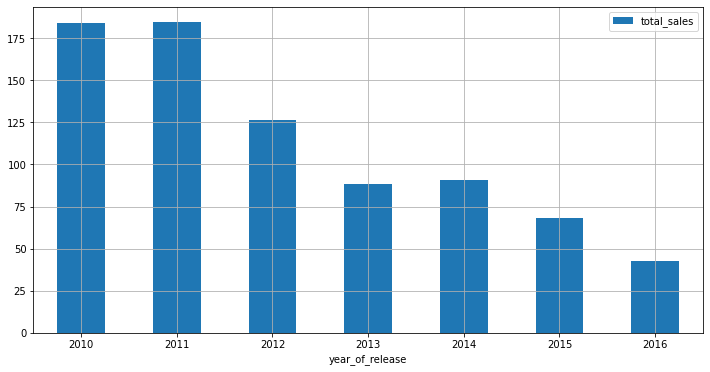

In [165]:
df_top_5_platforms.pivot_table(index=['year_of_release'], values=['total_sales'], aggfunc = 'sum').fillna(0).plot.bar(rot=0, grid=True, figsize=(12, 6), stacked=True)

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Для этого сохраним в переменной games_top топ 5 платформ.

In [166]:
platforms = ['PS2', 'PS3', 'X360', 'Wii', 'PS']
games_top = games[games['platform'].isin(['PS2', 'PS3', 'X360', 'Wii', 'PS'])]

In [167]:
games_top['total_sales'].describe()

count    7270.000000
mean        0.660963
std         1.775849
min         0.000000
25%         0.100000
50%         0.250000
75%         0.620000
max        82.540000
Name: total_sales, dtype: float64

In [168]:
games_top.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,7140.000000,7270.000000,7270.000000,7270.000000,7270.000000,7270.000000,7270.000000,7270.000000
mean,2006.334314,0.331942,0.194794,0.060656,0.073571,35.866162,3.695323,0.660963
std,4.971145,0.907229,0.612351,0.222535,0.255261,35.678628,3.693695,1.775849
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.030000,0.000000,0.000000,0.010000,0.000000,0.000000,0.100000
50%,2008.000000,0.110000,0.040000,0.000000,0.020000,41.000000,3.800000,0.250000
75%,2010.000000,0.310000,0.170000,0.030000,0.060000,71.000000,7.500000,0.620000
max,2016.000000,41.360000,28.960000,4.700000,10.570000,98.000000,9.500000,82.540000


(0.0, 3.0)

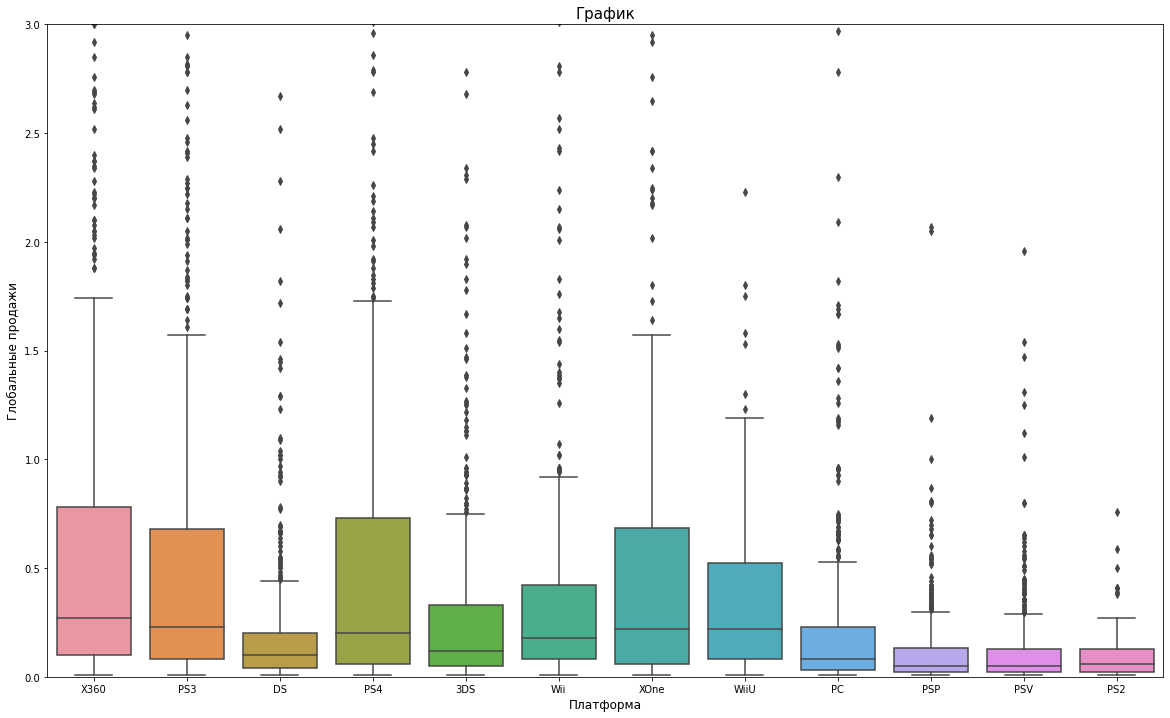

In [169]:
plt.figure(figsize=(20,12))
sns.boxplot(data=games_actual, x='platform', y='total_sales')
plt.title('График', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,3)

(0.0, 1.3)

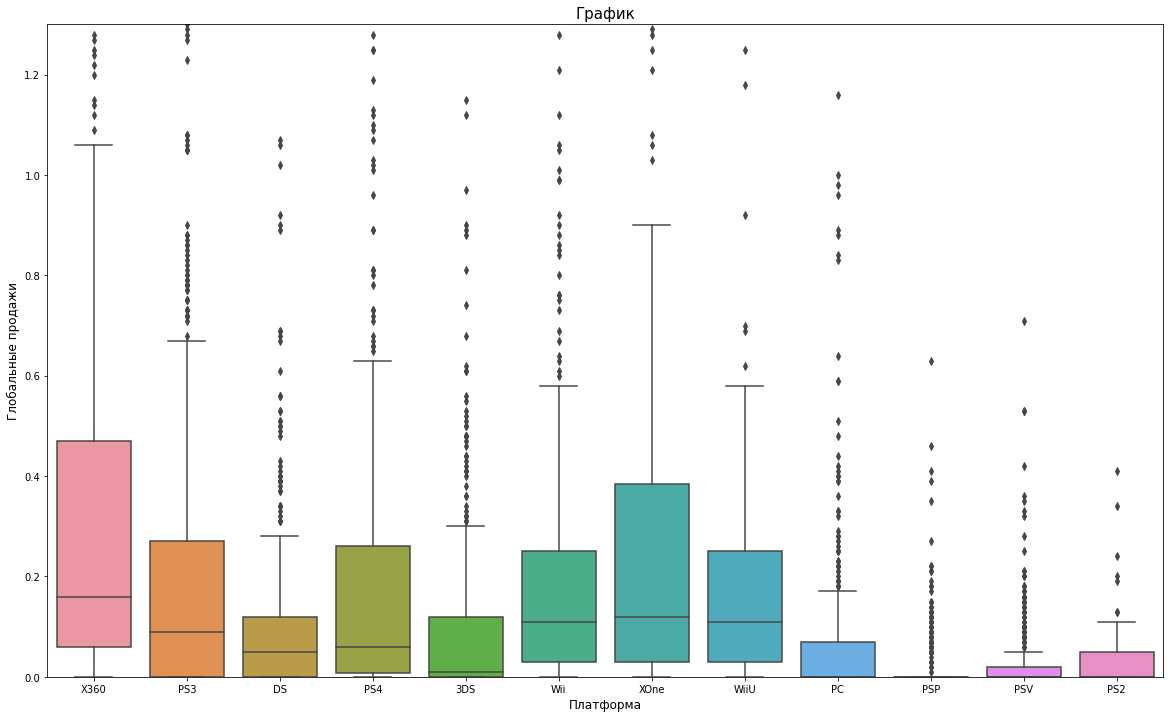

In [170]:
plt.figure(figsize=(20,12))
sns.boxplot(data=games_actual, x='platform', y='na_sales')
plt.title('График', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,1.3)

(0.0, 0.8)

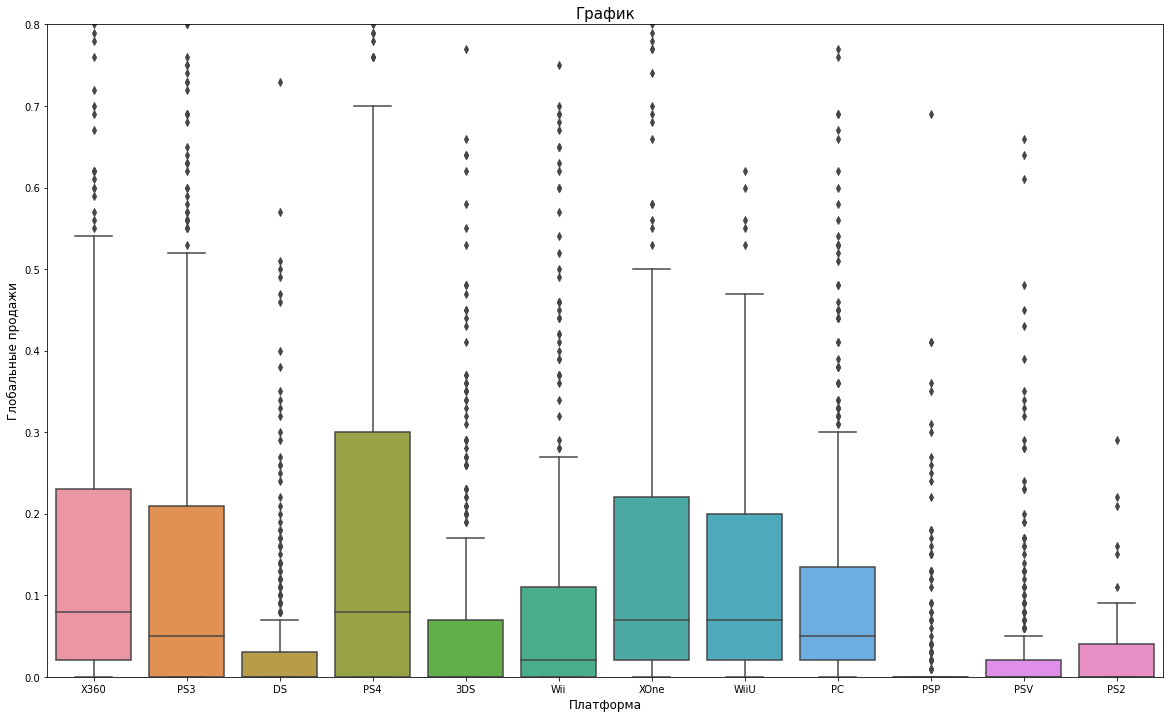

In [171]:
plt.figure(figsize=(20,12))
sns.boxplot(data=games_actual, x='platform', y='eu_sales')
plt.title('График', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0,0.8)

In [172]:
games_top[games_top['platform'] == 'X360'].count()

name               1262
platform           1262
year_of_release    1232
genre              1262
na_sales           1262
eu_sales           1262
jp_sales           1262
other_sales        1262
critic_score       1262
user_score         1262
rating             1262
total_sales        1262
dtype: int64

Исходя из графиков видно, что медиана по продажам у всех разная. Больше всех продаж у PS3, затем X360, после PS, PS2 и Wii.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

In [173]:
games_score = games_actual[(games_actual['user_score'] > 0)]
games_score = games_score[(games_score['critic_score'] > 0)]
games_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16652,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.00,81,8.5,E,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,Undefined,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.6,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61,5.8,T,0.01


In [174]:
X360 = games_score[games_score.platform == "X360"]

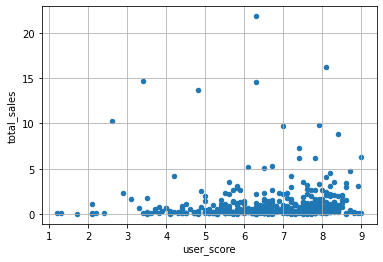

In [175]:
X360.plot(x="user_score", y="total_sales", kind='scatter', grid=True)

In [176]:
X360['critic_score'].corr(X360['total_sales'])

0.33628027358399615

Коэффициент корреляции между оценкой критиков и суммой продаж X360 умеренный



In [177]:
X360['user_score'].corr(X360['total_sales'])

0.05507910208601403

Коэффициент корреляции между оценкой пользователей и продажами X360 слабый

0.25493940851446456

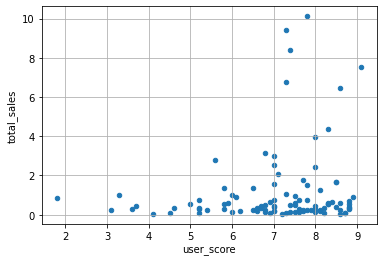

In [178]:
Wii = games_score[games_score.platform == "Wii"]
Wii.plot(x="user_score", y="total_sales", kind='scatter', grid=True)
Wii['critic_score'].corr(Wii['total_sales'])

In [179]:
Wii['user_score'].corr(Wii['total_sales'])

0.16127749022516433

Коэффициент корреляции между оценкой пользователей и продажами Wii слабый

0.39512111102003894

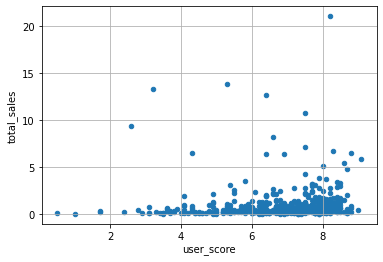

In [180]:
PS3 = games_score[games_score.platform == "PS3"]
PS3.plot(x="user_score", y="total_sales", kind='scatter', grid=True)
PS3['critic_score'].corr(PS3['total_sales'])

In [181]:
PS3['user_score'].corr(PS3['total_sales'])

0.08182415810682088

Коэффициент корреляции между оценкой пользователей и продажами PS3 слабый

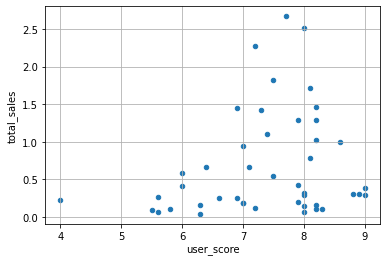

In [182]:
DS = games_score[games_score.platform == "DS"]
DS.plot(x="user_score", y="total_sales", kind='scatter', grid=True)

In [183]:
DS['critic_score'].corr(DS['total_sales'])

0.1741498095611847

In [184]:
DS['user_score'].corr(DS['total_sales'])

0.21202885369169958

Коэффициент корреляции между оценкой пользователей и продажами DS умеренный

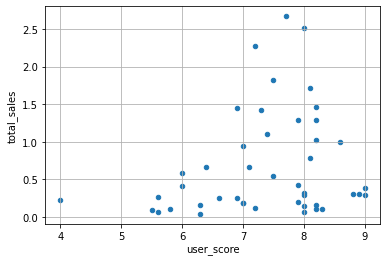

In [185]:
PS4 = games_score[games_score.platform == "DS"]
PS4.plot(x="user_score", y="total_sales", kind='scatter', grid=True)

In [186]:
PS4['critic_score'].corr(PS4['total_sales'])

0.1741498095611847

In [187]:
PS4['user_score'].corr(PS4['total_sales'])

0.21202885369169958

Коэффициент корреляции между оценкой пользователей и продажами PS4 умеренный

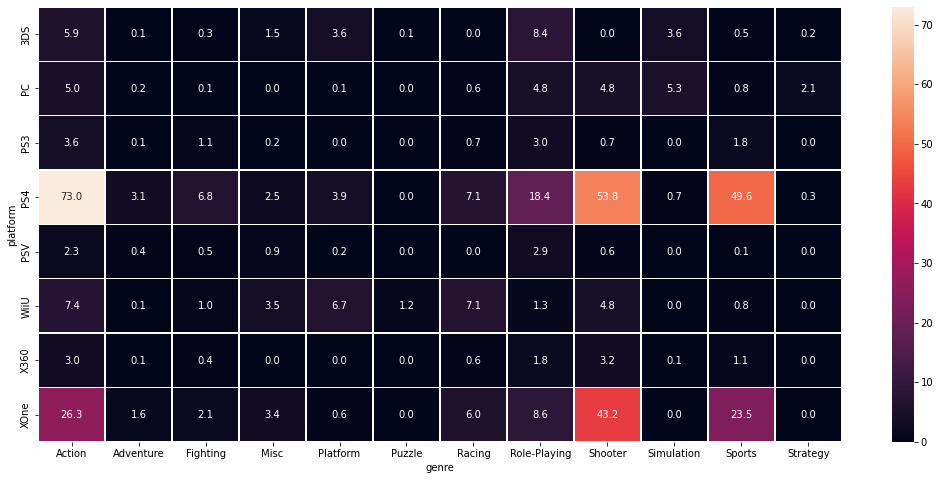

In [188]:
platform_genre_sales = games_score[games_score['year_of_release']>2013].pivot_table(
    index='platform', columns=['genre'], values='total_sales', aggfunc='sum').fillna(0)
plt.figure(figsize=(18,8))
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.5)

In [189]:
genres = games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')

In [190]:
genres.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Action,673.09
Shooter,479.74
Sports,328.38
Role-Playing,315.28
Misc,234.56
Racing,122.68
Platform,119.72
Fighting,81.59
Simulation,71.75


In [191]:
genres_col = games_actual.pivot_table(index='genre', values='total_sales', aggfunc='count').sort_values(by='total_sales', ascending=False) 
genres_col

,total_sales
genre,
Action,1495
Misc,576
Sports,574
Role-Playing,568
Adventure,563
Shooter,410
Racing,237
Simulation,217
Fighting,199


Больше всего игр в жанре Action, на втором месте игры в жанре Misc, а на третьем - Sports, далее идут Role-Playing и Adventure.

(0.0, 1.6)

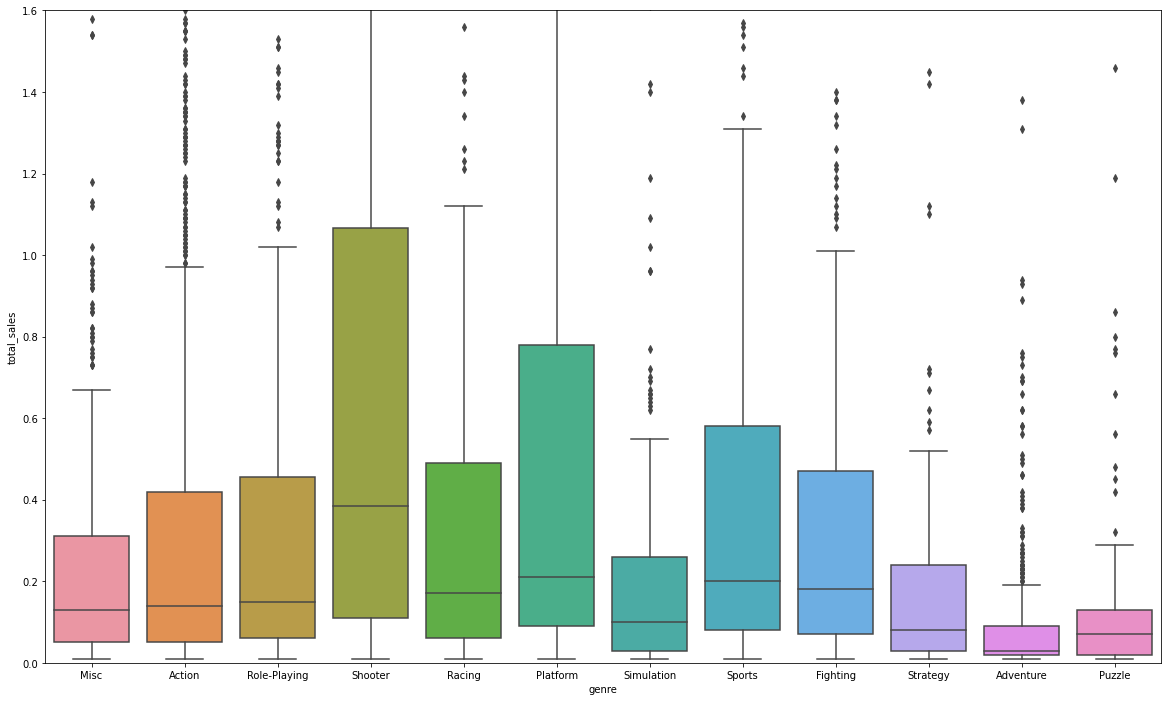

In [192]:
plt.figure(figsize=(20,12))
sns.boxplot(x='genre', y='total_sales', data=games_actual)
plt.ylim (0,1.6)

Самые продаваемые игры попали в топ жанров: Action, Shooter,
Sports. Хуже всего в выбранном периоде продаются игры Adventure, Puzzle, Strategy.

Медиана по жанру Shooter выше максимальных значений некоторых жанров, таких как Misc, Simulation, Puzzle и Adenture.

# Вывод по шагу 3


График показывает, что количество выпущенных игр начало расти с 1995 по 2009 год, а с 2009 года количество выпущенных игр начинает резко падать. Возможно это связано с созданием мобильных игр и вообще массовым появлением мобильных гаджетов. 

Интересно, что в 2014 году происходит заметный рост и возможно это связано с появлением приставок нового поколения, таких как Xbox One в 2013 году. 

Безусловно данные важны за все периоды, поскольку по этим данным можно отследить историю развития компьютерных игр, связать с различными событиями, сделать выводы и спланировать не только рекламную кампанию в текущем периоде, но и предсказать развитие технологий в будущем.

График показывает, что больше всего продаж на платформах PS2, X360, WII, PS3, DS и PS

На графике заметен характерный срок "активной" жизни платформы, он составляет от 6 до 7 лет. Далее происходит вытеснение новыми платформами.

Потенциально прибылтные платформы: 'PS2', 'PS3', 'X360', 'Wii', 'PS'.

Самые продаваемые игры попали в топ жанров: Action, Shooter,
Sports. Хуже всего в выбранном периоде продаются игры Adventure, Puzzle, Strategy.

# **Шаг 4. Составим портрет пользователя каждого региона**

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишем различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [193]:
NA_platforms = games_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum') 
NA_platforms = NA_platforms.sort_values(by='na_sales', ascending=False)                    
NA_platforms['ratio'] = NA_platforms['na_sales'] / NA_platforms['na_sales'].sum()          
NA_platforms

,na_sales,ratio
platform,,
X360,334.18,0.295627
PS3,229.25,0.202803
Wii,121.20,0.107218
PS4,108.74,0.096195
XOne,93.12,0.082377
3DS,82.65,0.073115
DS,59.66,0.052777
PC,39.07,0.034563
WiiU,38.10,0.033705


In [194]:
EU_platforms = games_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum') 
EU_platforms = EU_platforms.sort_values(by='eu_sales', ascending=False)                    
EU_platforms['ratio'] = EU_platforms['eu_sales'] / EU_platforms['eu_sales'].sum()         
EU_platforms

,eu_sales,ratio
platform,,
PS3,213.59,0.253911
X360,163.41,0.194258
PS4,141.09,0.167725
PC,68.82,0.081812
Wii,65.91,0.078352
3DS,61.27,0.072836
XOne,51.59,0.061329
DS,28.06,0.033357
WiiU,25.13,0.029874


In [195]:
JP_platforms = games_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum') 
JP_platforms = JP_platforms.sort_values(by='jp_sales', ascending=False)                    
JP_platforms['ratio'] = JP_platforms['jp_sales'] / JP_platforms['jp_sales'].sum()          
JP_platforms

,jp_sales,ratio
platform,,
3DS,100.62,0.329750
PS3,59.26,0.194206
PSP,42.20,0.138297
DS,27.90,0.091433
PSV,21.84,0.071574
Wii,17.75,0.058170
PS4,15.96,0.052304
WiiU,13.01,0.042636
X360,5.46,0.017893


In [196]:
NA_genre = games_actual.pivot_table(index='genre', values='na_sales', aggfunc='sum') 
NA_genre = NA_genre.sort_values(by='na_sales', ascending=False)                    
NA_genre['ratio'] = NA_genre['na_sales'] / NA_genre['na_sales'].sum()         
NA_genre

,na_sales,ratio
genre,,
Action,290.64,0.257110
Shooter,237.47,0.210074
Sports,156.81,0.138720
Misc,123.80,0.109518
Role-Playing,112.05,0.099123
Platform,54.90,0.048566
Racing,46.11,0.040791
Fighting,39.05,0.034545
Simulation,26.39,0.023346


In [197]:
EU_genre = games_actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum') 
EU_genre = EU_genre.sort_values(by='eu_sales', ascending=False)                    
EU_genre['ratio'] = EU_genre['eu_sales'] / EU_genre['eu_sales'].sum()          
EU_genre

,eu_sales,ratio
genre,,
Action,233.63,0.277734
Shooter,171.45,0.203816
Sports,116.83,0.138885
Role-Playing,75.48,0.089729
Misc,66.09,0.078566
Racing,54.75,0.065086
Platform,38.30,0.045530
Simulation,26.39,0.031372
Fighting,20.33,0.024168


In [198]:
JP_genre = games_actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum') 
JP_genre = JP_genre.sort_values(by='jp_sales', ascending=False)                    
JP_genre['ratio'] = JP_genre['jp_sales'] / JP_genre['jp_sales'].sum()          
JP_genre

,jp_sales,ratio
genre,,
Role-Playing,103.54,0.339320
Action,72.20,0.236613
Misc,24.29,0.079603
Platform,15.81,0.051812
Adventure,15.67,0.051353
Sports,15.51,0.050829
Shooter,14.04,0.046012
Fighting,13.90,0.045553
Simulation,13.30,0.043587


In [199]:
NA_ratio = games_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum')
NA_ratio = NA_ratio.sort_values(by='na_sales', ascending=False)
NA_ratio['ratio'] = NA_ratio['na_sales'] / NA_ratio['na_sales'].sum()
NA_ratio

,na_sales,ratio
rating,,
M,382.22,0.338125
E,271.15,0.239869
T,160.81,0.142258
E10+,159.38,0.140993
Undefined,155.72,0.137755
EC,1.13,0.001000
RP,0.00,0.000000


In [200]:
EU_ratio = games_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
EU_ratio = EU_ratio.sort_values(by='eu_sales', ascending=False)
EU_ratio['ratio'] = EU_ratio['eu_sales'] / EU_ratio['eu_sales'].sum()
EU_ratio

,eu_sales,ratio
rating,,
M,292.04,0.347171
E,197.33,0.234582
Undefined,139.44,0.165763
T,113.08,0.134427
E10+,99.28,0.118022
RP,0.03,0.000036
EC,0.00,0.000000


In [201]:
JP_ratio = games_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
JP_ratio = JP_ratio.sort_values(by='jp_sales', ascending=False)
JP_ratio['ratio'] = JP_ratio['jp_sales'] / JP_ratio['jp_sales'].sum()
JP_ratio

,jp_sales,ratio
rating,,
Undefined,171.49,0.562004
E,47.87,0.156879
T,42.11,0.138002
M,30.45,0.099790
E10+,13.22,0.043324
EC,0.00,0.000000
RP,0.00,0.000000


В столбце рейтинга пропуски заменены на Undefined, что позволило оценить категорию игр без возрастного рейтинга.


# Вывод по шагу 4

В Северной Америке в рейтинге по продажам лидирует X360, в Европе - DS, а в Японии - PS3. 

В Северной Америке в рейтинге по жанрам лидируют игры Action, в Европе - Action, а в Японии - Role-Playing.

Рейтинг ESRB в Северной Америке игры с МЕТ, в Европе Т вытесняют игры без категории. В Японии лидеруют продажи игр без категории, далее идет рейтинг Т и М.

# **Шаг 5. Проверим гипотезы**

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Зададим самостоятельно пороговое значение alpha.

Поясним:

* Как сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

**Сформулируем гипотезы:**

1. **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_a: Средние пользовательские рейтинги платформ Xbox One и PC различаются

2. **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые

H_a: Средние пользовательские рейтинги платформ Action и Sports различаются

In [202]:
results = st.ttest_ind(
    games_score[games_score['platform'] == 'XOne']['user_score'],
games_score[games_score['platform'] == 'PC']['user_score'], equal_var = False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9127457287129067
Не получилось отвергнуть нулевую гипотезу


In [203]:
results = st.ttest_ind(
    games_score[games_score['genre'] == 'Action']['user_score'],
games_score[games_score['genre'] == 'Sports']['user_score'], equal_var = False)

alpha = 0.05

print(results.pvalue) 
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1664008556696883e-09
Отвергаем нулевую гипотезу


# Вывод по шагу 5 

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

2. Средние пользовательские рейтинги жанров Action и Sports различаются.


# **Шаг 6. Напишем общий вывод**



# Общий вывод

На **первом шаге** сборного проекта была изучена основная информация. 

На **втором шаге** проведена предобработка данных. Заменены названия столбцов, преобразованы типы данных для проведения дальнейшего исследования. Заполнены пропуски там, где это необходимо. Изучена аббреиатура 'tbd' в столбце с оценкой пользователей, принято решение заполнить данные нулевым значением. Посчитаны суммарные продажи во всех регионах, записаны в отдельный столбец 'total_sales'.

Проведен исследовательский анализ данных. Количество выпущенных игр начало расти с 1995 по 2009 год, а с 2009 года количество выпущенных игр начинает резко падать. 

Интересно, что в 2014 году происходит заметный рост и возможно это связано с появлением приставок нового поколения, таких как Xbox One в 2013 году.

Безусловно данные важны за все периоды, поскольку по этим данным можно отследить историю развития компьютерных игр, связать с различными событиями, сделать выводы и спланировать не только рекламную кампанию в текущем периоде, но и предсказать развитие технологий в будущем.

Изучены продажи по платформам. Больше всего продаж на платформах PS2, X360, WII, PS3, DS и PS.

На графике заметен характерный срок "активной" жизни платформы, он составляет 7-8 лет. Далее происходит вытеснение новыми платформами.

На **3 шаге** выбран актуальный период (с 2008 года) для провения исследовательского анализа данных и дальнейших шагов проекта. 

За весь период самыми популярными игровыми платформами оказались 'PS2', 'PS3', 'X360', 'Wii' и 'PS'.

Самые продаваемые игры попали в топ жанров: Action, Shooter, Sports. Хуже всего в выбранном периоде продаются игры Adventure, Puzzle, Strategy.

Коэффициент корреляции между оценкой пользователей и продажами топ 5 платформ слабый. Коэффициент корреляции между оценкой критиков и продажами топ 5 платформ слабый, кроме продаж DS и PS4, в этом случае корреляция умеренная. Данные говорят о том, что покупатели прислушиваются больше к оценкам критиков, нежели к оценкам других пользователей.

На **4 шаге** составлен портрет пользователя по каждому региону (NA, EU, JP). В Северной Америке в рейтинге по продажам лидирует X360, в Европе - DS, а в Японии - PS3. В Северной Америке в рейтинге по жанрам лидируют игры Action, в Европе - Action, а в Японии - Role-Playing. В Японии лидируют игры без категории.

На **5 шаге** проверены гипотезы и выявлено:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports различаются.


